# **EPL 2023-2024 **

**Dataset Description** <br><br>
round_number: There were 38 rounds/weeks last season  <br>
league_name: The name of the league <br>
name: The names of both the teams between which the match was played <br>  
starting_at: The date on which the match was played <br>
home_team_name: The team on whose home ground the match was played <br>
away_team_name: The team that had to travel to play  <br>
home_team_goals: The goals scored by home team <br>
away_team_goals: The goals scored by away team <br>

In [52]:
#Importing Libraries
import pandas as pd
from collections import defaultdict
import datetime as dt
from datetime import datetime  
import seaborn as sns
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np

In [53]:
file_path = '/kaggle/input/premier-league-20232024/PremierLeague.csv'
df = pd.read_csv(file_path)
print(df)

     round_number     league_name                                   name  \
0               1  Premier League             Burnley vs Manchester City   
1               1  Premier League           Arsenal vs Nottingham Forest   
2               1  Premier League     AFC Bournemouth vs West Ham United   
3               1  Premier League   Brighton & Hove Albion vs Luton Town   
4               1  Premier League                      Everton vs Fulham   
..            ...             ...                                    ...   
375            38  Premier League          Crystal Palace vs Aston Villa   
376            38  Premier League   Liverpool vs Wolverhampton Wanderers   
377            38  Premier League                   Luton Town vs Fulham   
378            38  Premier League     Manchester City vs West Ham United   
379            38  Premier League  Sheffield United vs Tottenham Hotspur   

    starting_at          home_team_name           away_team_name  \
0     8/11/2023    

In [54]:
df['goal_conceded_by_home_team']=df['away_team_goals']
df['goal_conceded_by_away_team']=df['home_team_goals']
df['goal_scored']= df['away_team_goals']+df['home_team_goals']
df['Difference']= df['home_team_goals']-df['away_team_goals']
      

In [55]:
print(df)

     round_number     league_name                                   name  \
0               1  Premier League             Burnley vs Manchester City   
1               1  Premier League           Arsenal vs Nottingham Forest   
2               1  Premier League     AFC Bournemouth vs West Ham United   
3               1  Premier League   Brighton & Hove Albion vs Luton Town   
4               1  Premier League                      Everton vs Fulham   
..            ...             ...                                    ...   
375            38  Premier League          Crystal Palace vs Aston Villa   
376            38  Premier League   Liverpool vs Wolverhampton Wanderers   
377            38  Premier League                   Luton Town vs Fulham   
378            38  Premier League     Manchester City vs West Ham United   
379            38  Premier League  Sheffield United vs Tottenham Hotspur   

    starting_at          home_team_name           away_team_name  \
0     8/11/2023    

In [56]:
df_new = df[df['Difference'] == 0]
print(df_new)

     round_number     league_name                                        name  \
2               1  Premier League          AFC Bournemouth vs West Ham United   
7               1  Premier League              Brentford vs Tottenham Hotspur   
8               1  Premier League                        Chelsea vs Liverpool   
21              3  Premier League                           Arsenal vs Fulham   
22              3  Premier League                 Brentford vs Crystal Palace   
..            ...             ...                                         ...   
342            35  Premier League                      Aston Villa vs Chelsea   
347            36  Premier League                       Luton Town vs Everton   
349            36  Premier League                         Brentford vs Fulham   
360            37  Premier League  Newcastle United vs Brighton & Hove Albion   
366            37  Premier League                    Aston Villa vs Liverpool   

    starting_at    home_tea

In [57]:
def determine_winner(diff):
    if diff == 0:
        return 'Draw'
    elif diff < 0:
        return 'Away team won'
    else:
        return 'Home team won'
df['Winner'] = df['Difference'].apply(determine_winner) 
print(df)

     round_number     league_name                                   name  \
0               1  Premier League             Burnley vs Manchester City   
1               1  Premier League           Arsenal vs Nottingham Forest   
2               1  Premier League     AFC Bournemouth vs West Ham United   
3               1  Premier League   Brighton & Hove Albion vs Luton Town   
4               1  Premier League                      Everton vs Fulham   
..            ...             ...                                    ...   
375            38  Premier League          Crystal Palace vs Aston Villa   
376            38  Premier League   Liverpool vs Wolverhampton Wanderers   
377            38  Premier League                   Luton Town vs Fulham   
378            38  Premier League     Manchester City vs West Ham United   
379            38  Premier League  Sheffield United vs Tottenham Hotspur   

    starting_at          home_team_name           away_team_name  \
0     8/11/2023    

In [58]:
df.head()

,round_number,league_name,name,starting_at,home_team_name,away_team_name,home_team_goals,away_team_goals,goal_conceded_by_home_team,goal_conceded_by_away_team,goal_scored,Difference,Winner
0,1,Premier League,Burnley vs Manchester City,8/11/2023,Burnley,Manchester City,0,3,3,0,3,-3,Away team won
1,1,Premier League,Arsenal vs Nottingham Forest,8/12/2023,Arsenal,Nottingham Forest,2,1,1,2,3,1,Home team won
2,1,Premier League,AFC Bournemouth vs West Ham United,8/12/2023,AFC Bournemouth,West Ham United,1,1,1,1,2,0,Draw
3,1,Premier League,Brighton & Hove Albion vs Luton Town,8/12/2023,Brighton & Hove Albion,Luton Town,4,1,1,4,5,3,Home team won
4,1,Premier League,Everton vs Fulham,8/12/2023,Everton,Fulham,0,1,1,0,1,-1,Away team won


In [59]:
team_stats_list = []

for index, row in df.iterrows():
    if row['Winner'] == 'Home team won':
        team_stats_list.append({'team_name': row['home_team_name'], 'wins': 1, 'draws': 0, 'losses': 0, 'points': 3})
        team_stats_list.append({'team_name': row['away_team_name'], 'wins': 0, 'draws': 0, 'losses': 1, 'points': 0})
    elif row['Winner'] == 'Away team won':
        team_stats_list.append({'team_name': row['home_team_name'], 'wins': 0, 'draws': 0, 'losses': 1, 'points': 0})
        team_stats_list.append({'team_name': row['away_team_name'], 'wins': 1, 'draws': 0, 'losses': 0, 'points': 3})
    elif row['Winner'] == 'Draw':
        team_stats_list.append({'team_name': row['home_team_name'], 'wins': 0, 'draws': 1, 'losses': 0, 'points': 1})
        team_stats_list.append({'team_name': row['away_team_name'], 'wins': 0, 'draws': 1, 'losses': 0, 'points': 1})

# Convert the list to a DataFrame
team_stats_df = pd.DataFrame(team_stats_list)

# Group by team name and sum up the wins, draws, losses, and points
team_stats = team_stats_df.groupby('team_name').sum().reset_index()

# Sort the DataFrame by points, wins, and then by draws
team_stats = team_stats.sort_values(by=['points', 'wins', 'draws'], ascending=False).reset_index(drop=True)

# Display the final DataFrame
print(team_stats)

                  team_name  wins  draws  losses  points
0           Manchester City    28      7       3      91
1                   Arsenal    28      5       5      89
2                 Liverpool    24     10       4      82
3               Aston Villa    20      8      10      68
4         Tottenham Hotspur    20      6      12      66
5                   Chelsea    18      9      11      63
6         Manchester United    18      6      14      60
7          Newcastle United    18      6      14      60
8           West Ham United    14     10      14      52
9            Crystal Palace    13     10      15      49
10          AFC Bournemouth    13      9      16      48
11                  Everton    13      9      16      48
12   Brighton & Hove Albion    12     12      14      48
13                   Fulham    13      8      17      47
14  Wolverhampton Wanderers    13      7      18      46
15                Brentford    10      9      19      39
16        Nottingham Forest    

In [60]:
team_stats['total_matches']=team_stats['wins']+team_stats['draws']+team_stats['losses']
print(team_stats)

                  team_name  wins  draws  losses  points  total_matches
0           Manchester City    28      7       3      91             38
1                   Arsenal    28      5       5      89             38
2                 Liverpool    24     10       4      82             38
3               Aston Villa    20      8      10      68             38
4         Tottenham Hotspur    20      6      12      66             38
5                   Chelsea    18      9      11      63             38
6         Manchester United    18      6      14      60             38
7          Newcastle United    18      6      14      60             38
8           West Ham United    14     10      14      52             38
9            Crystal Palace    13     10      15      49             38
10          AFC Bournemouth    13      9      16      48             38
11                  Everton    13      9      16      48             38
12   Brighton & Hove Albion    12     12      14      48        

In [61]:
winners= df['Winner'].value_counts()
df_win= pd.DataFrame(winners)
df_win = winners.reset_index()
df_win.columns = ['Winner', 'count']
print("The winners: \n",df_win)

The winners: 
           Winner  count
0  Home team won    175
1  Away team won    123
2           Draw     82


In [62]:

print(df_win)

          Winner  count
0  Home team won    175
1  Away team won    123
2           Draw     82


In [63]:
# Calculate goals scored and conceded by each team
home_goals_scored = df.groupby('home_team_name')['home_team_goals'].sum().reset_index().rename(columns={'home_team_goals': 'home_goals_scored'})
away_goals_scored = df.groupby('away_team_name')['away_team_goals'].sum().reset_index().rename(columns={'away_team_goals': 'away_goals_scored'})
home_goals_conceded = df.groupby('home_team_name')['goal_conceded_by_home_team'].sum().reset_index().rename(columns={'goal_conceded_by_home_team': 'home_goals_conceded'})
away_goals_conceded = df.groupby('away_team_name')['goal_conceded_by_away_team'].sum().reset_index().rename(columns={'goal_conceded_by_away_team': 'away_goals_conceded'})


In [64]:
print(home_goals_scored)

             home_team_name  home_goals_scored
0           AFC Bournemouth                 27
1                   Arsenal                 48
2               Aston Villa                 48
3                 Brentford                 29
4    Brighton & Hove Albion                 30
5                   Burnley                 19
6                   Chelsea                 44
7            Crystal Palace                 37
8                   Everton                 22
9                    Fulham                 31
10                Liverpool                 49
11               Luton Town                 28
12          Manchester City                 51
13        Manchester United                 31
14         Newcastle United                 49
15        Nottingham Forest                 27
16         Sheffield United                 19
17        Tottenham Hotspur                 38
18          West Ham United                 31
19  Wolverhampton Wanderers                 26


In [65]:
# Combine all the results into a single DataFrame
total_goals = home_goals_scored.merge(away_goals_scored, left_on='home_team_name', right_on='away_team_name', how='outer')
total_goals = total_goals.merge(home_goals_conceded, on='home_team_name', how='outer')
total_goals = total_goals.merge(away_goals_conceded, left_on='home_team_name', right_on='away_team_name', how='outer')
total_goals = total_goals.fillna(0)
total_goals = total_goals[['home_team_name', 'home_goals_scored', 'away_goals_scored', 'home_goals_conceded', 'away_goals_conceded']]
print(total_goals)

             home_team_name  home_goals_scored  away_goals_scored  \
0           AFC Bournemouth                 27                 27   
1                   Arsenal                 48                 43   
2               Aston Villa                 48                 28   
3                 Brentford                 29                 27   
4    Brighton & Hove Albion                 30                 25   
5                   Burnley                 19                 22   
6                   Chelsea                 44                 33   
7            Crystal Palace                 37                 20   
8                   Everton                 22                 18   
9                    Fulham                 31                 24   
10                Liverpool                 49                 37   
11               Luton Town                 28                 24   
12          Manchester City                 51                 45   
13        Manchester United       

In [66]:
total_goals['Scored']= total_goals['home_goals_scored']+total_goals['away_goals_scored']
total_goals['Conceded']= total_goals['home_goals_conceded']+total_goals['away_goals_conceded']
total_goals['Goal Difference']= total_goals['Scored']- total_goals['Conceded']
print(total_goals)

             home_team_name  home_goals_scored  away_goals_scored  \
0           AFC Bournemouth                 27                 27   
1                   Arsenal                 48                 43   
2               Aston Villa                 48                 28   
3                 Brentford                 29                 27   
4    Brighton & Hove Albion                 30                 25   
5                   Burnley                 19                 22   
6                   Chelsea                 44                 33   
7            Crystal Palace                 37                 20   
8                   Everton                 22                 18   
9                    Fulham                 31                 24   
10                Liverpool                 49                 37   
11               Luton Town                 28                 24   
12          Manchester City                 51                 45   
13        Manchester United       

In [67]:
df['starting_at']= pd.to_datetime(df['starting_at'])
df['year'] = df['starting_at'].dt.year
df['month'] = df['starting_at'].dt.month
print(df)

     round_number     league_name                                   name  \
0               1  Premier League             Burnley vs Manchester City   
1               1  Premier League           Arsenal vs Nottingham Forest   
2               1  Premier League     AFC Bournemouth vs West Ham United   
3               1  Premier League   Brighton & Hove Albion vs Luton Town   
4               1  Premier League                      Everton vs Fulham   
..            ...             ...                                    ...   
375            38  Premier League          Crystal Palace vs Aston Villa   
376            38  Premier League   Liverpool vs Wolverhampton Wanderers   
377            38  Premier League                   Luton Town vs Fulham   
378            38  Premier League     Manchester City vs West Ham United   
379            38  Premier League  Sheffield United vs Tottenham Hotspur   

    starting_at          home_team_name           away_team_name  \
0    2023-08-11    

In [68]:
##Each team playes 38 matches

In [69]:
total_goals['avg goals scored per match']= total_goals['Scored']/38
total_goals['avg goals concede per match']= total_goals['Conceded']/38
print(total_goals)

             home_team_name  home_goals_scored  away_goals_scored  \
0           AFC Bournemouth                 27                 27   
1                   Arsenal                 48                 43   
2               Aston Villa                 48                 28   
3                 Brentford                 29                 27   
4    Brighton & Hove Albion                 30                 25   
5                   Burnley                 19                 22   
6                   Chelsea                 44                 33   
7            Crystal Palace                 37                 20   
8                   Everton                 22                 18   
9                    Fulham                 31                 24   
10                Liverpool                 49                 37   
11               Luton Town                 28                 24   
12          Manchester City                 51                 45   
13        Manchester United       

In [70]:
total_goals.head()

,home_team_name,home_goals_scored,away_goals_scored,home_goals_conceded,away_goals_conceded,Scored,Conceded,Goal Difference,avg goals scored per match,avg goals concede per match
0,AFC Bournemouth,27,27,28,39,54,67,-13,1.421053,1.763158
1,Arsenal,48,43,16,13,91,29,62,2.394737,0.763158
2,Aston Villa,48,28,28,33,76,61,15,2.000000,1.605263
3,Brentford,29,27,34,31,56,65,-9,1.473684,1.710526
4,Brighton & Hove Albion,30,25,27,35,55,62,-7,1.447368,1.631579


##Data Visualization

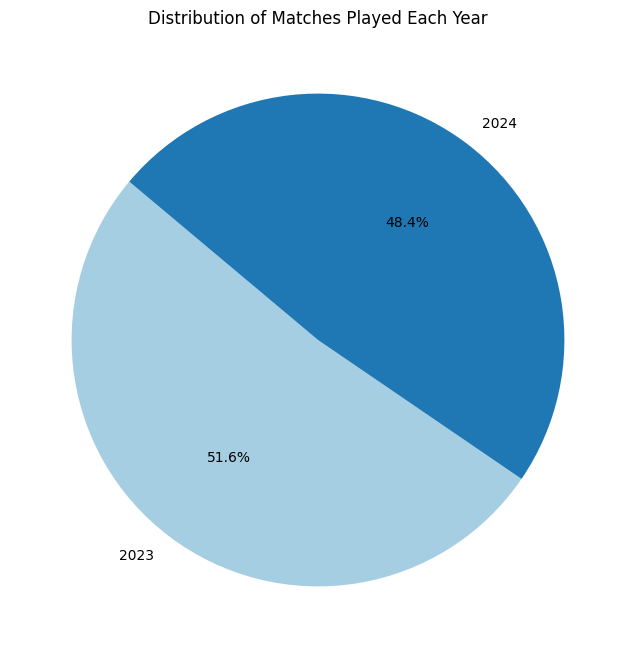

In [71]:
df['starting_at'] = pd.to_datetime(df['starting_at'])

# Extract the year
df['year'] = df['starting_at'].dt.year

# Group by year and count the number of matches
matches_per_year = df.groupby('year').size()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(matches_per_year, labels=matches_per_year.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Matches Played Each Year')
plt.show()

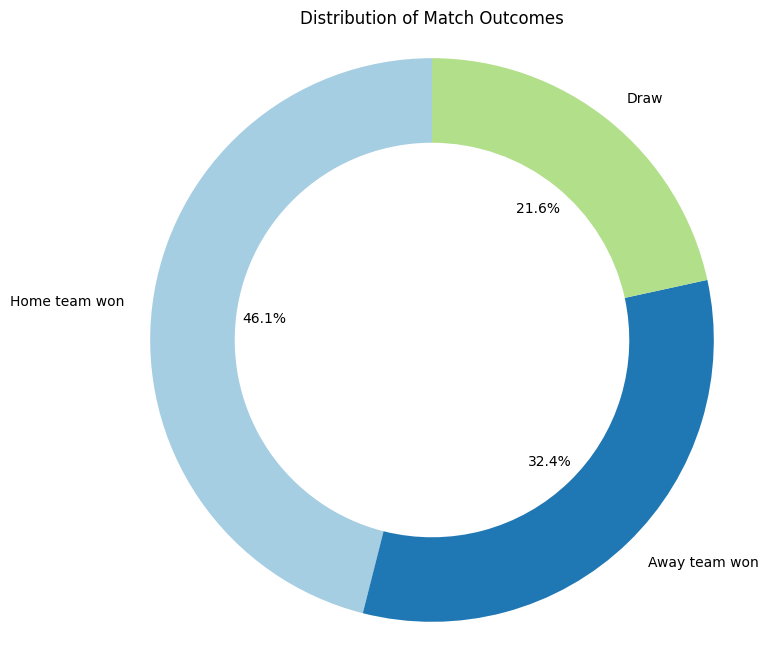

In [72]:


df_win.set_index('Winner', inplace=True)

# Plotting the donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df_win['count'], labels=df_win.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops={'width': 0.3})

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Title
plt.title('Distribution of Match Outcomes')

plt.show()

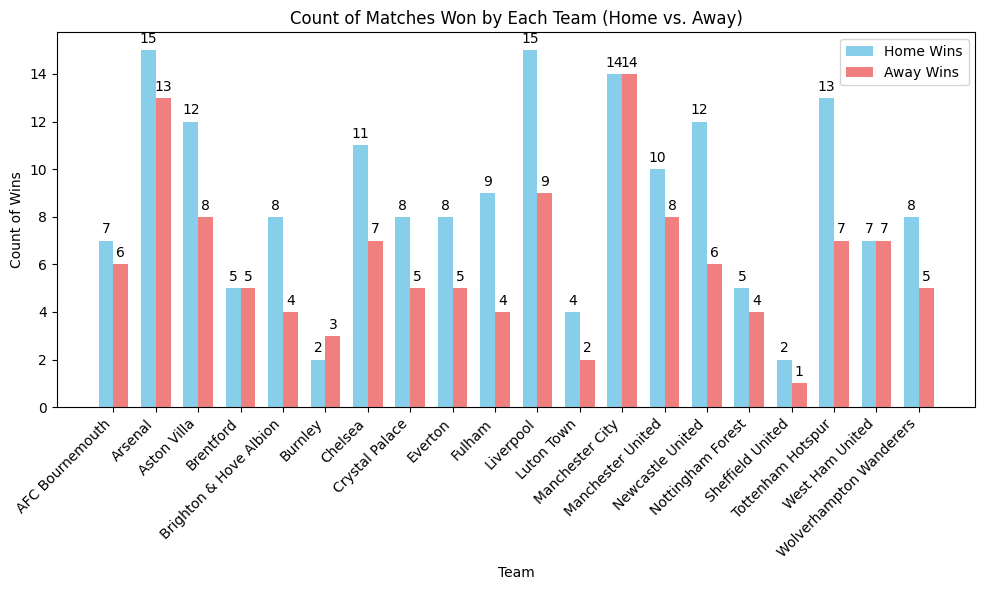

In [73]:
home_wins = df[df['Winner'] == 'Home team won'].groupby('home_team_name').size()
away_wins = df[df['Winner'] == 'Away team won'].groupby('away_team_name').size()

# Combine home and away wins into a single DataFrame
wins_df = pd.DataFrame({'home_wins': home_wins, 'away_wins': away_wins}).fillna(0)

# Sort teams alphabetically for a clear bar chart
wins_df = wins_df.sort_index()

# Plotting
x = np.arange(len(wins_df.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, wins_df['home_wins'], width, label='Home Wins', color='skyblue')
rects2 = ax.bar(x + width/2, wins_df['away_wins'], width, label='Away Wins', color='lightcoral')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Team')
ax.set_ylabel('Count of Wins')
ax.set_title('Count of Matches Won by Each Team (Home vs. Away)')
ax.set_xticks(x)
ax.set_xticklabels(wins_df.index, rotation=45, ha="right")
ax.legend()

# Add values on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

plt.show()

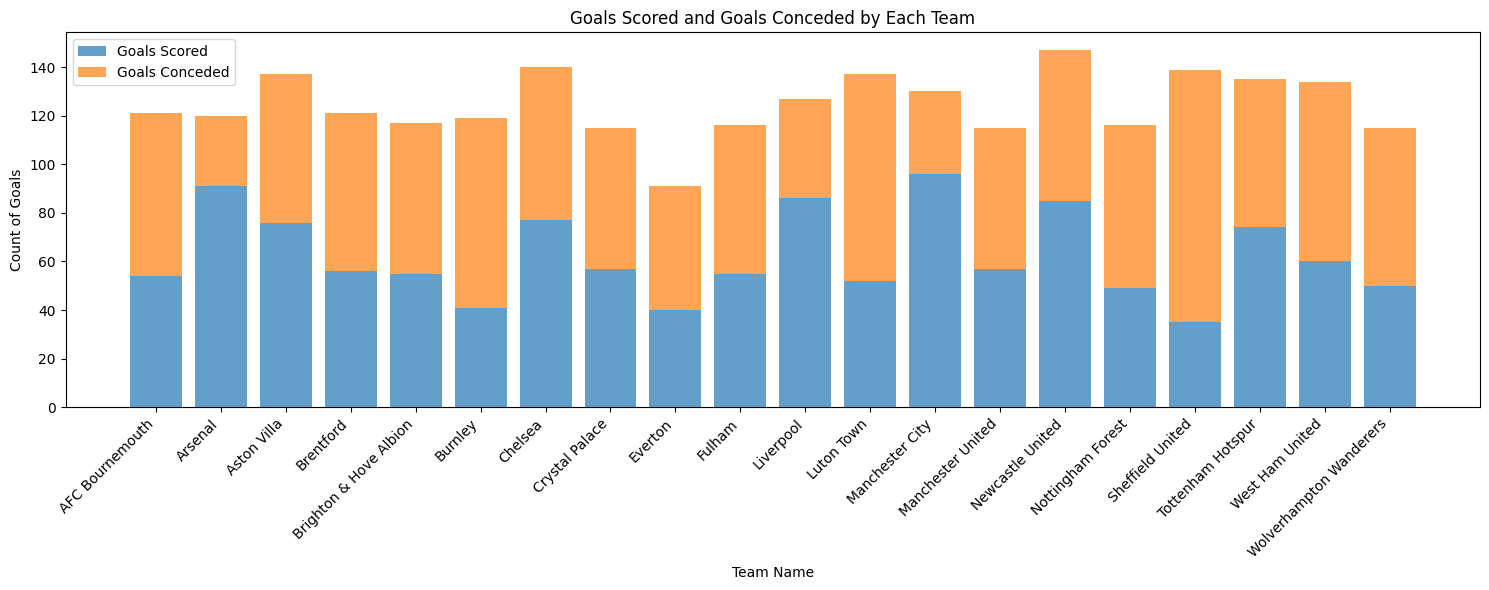

In [74]:
fig, ax = plt.subplots(figsize=(15, 6))

# Bar chart for goals scored
ax.bar(total_goals['home_team_name'], total_goals['Scored'], label='Goals Scored', alpha=0.7)

# Bar chart for goals conceded
ax.bar(total_goals['home_team_name'], total_goals['Conceded'], label='Goals Conceded', alpha=0.7, bottom=total_goals['Scored'])

# Labels and title
ax.set_xlabel('Team Name')
ax.set_ylabel('Count of Goals')
ax.set_title('Goals Scored and Goals Conceded by Each Team')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

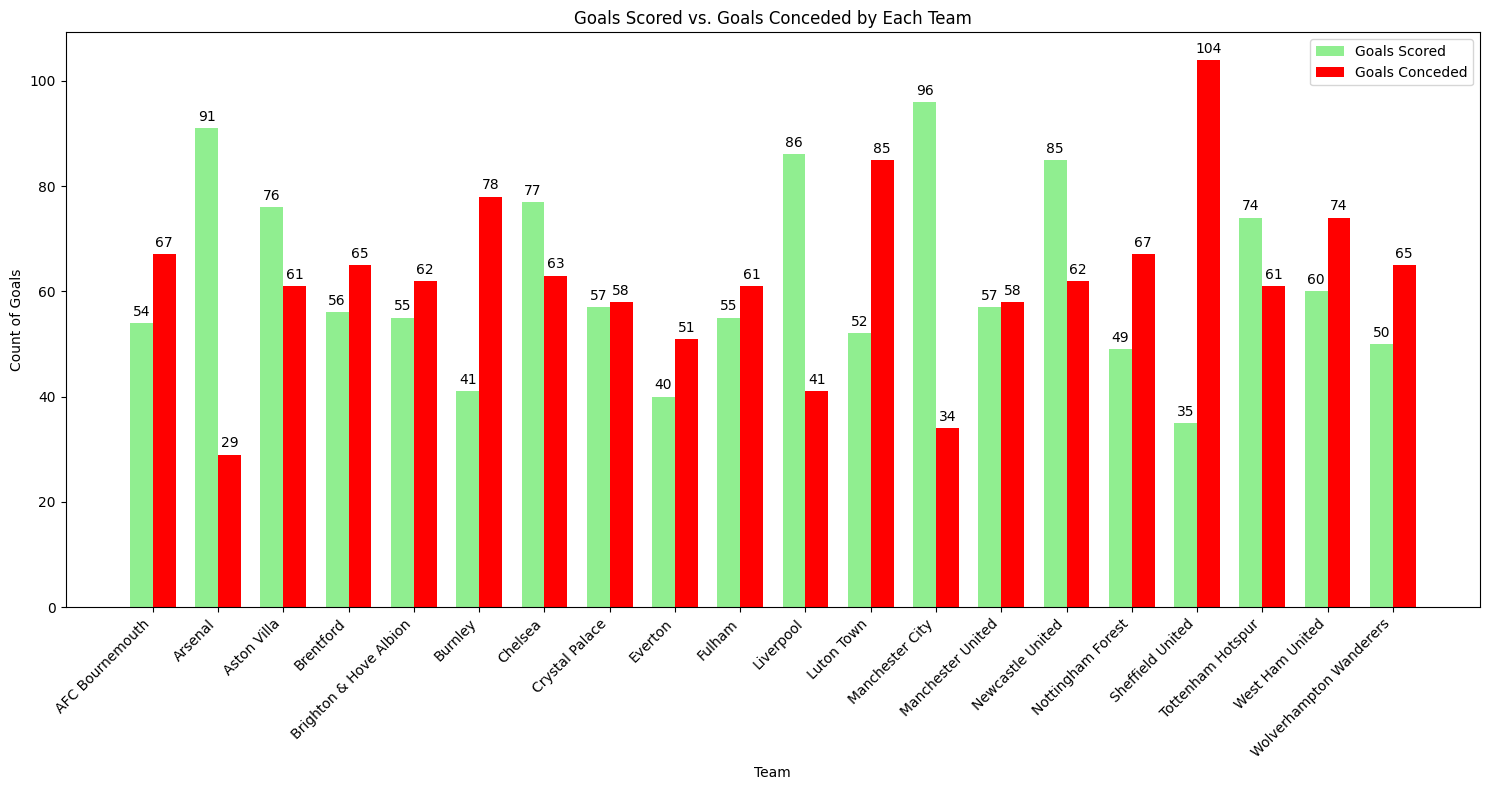

In [75]:
team_stats_1 = total_goals[['home_team_name', 'Scored', 'Conceded']]

# Sort teams alphabetically for a clear bar chart
team_stats_1 = team_stats_1.sort_values(by='home_team_name').reset_index(drop=True)

# Plotting
x = np.arange(len(team_stats_1['home_team_name']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width/2, team_stats_1['Scored'], width, label='Goals Scored', color='lightgreen')
rects2 = ax.bar(x + width/2, team_stats_1['Conceded'], width, label='Goals Conceded', color='red')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Team')
ax.set_ylabel('Count of Goals')
ax.set_title('Goals Scored vs. Goals Conceded by Each Team')
ax.set_xticks(x)
ax.set_xticklabels(team_stats_1['home_team_name'], rotation=45, ha="right")
ax.legend()

# Add values on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

plt.show()

/tmp/ipykernel_33/1056510733.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df2['home_team_name'], rotation=45, ha="right")


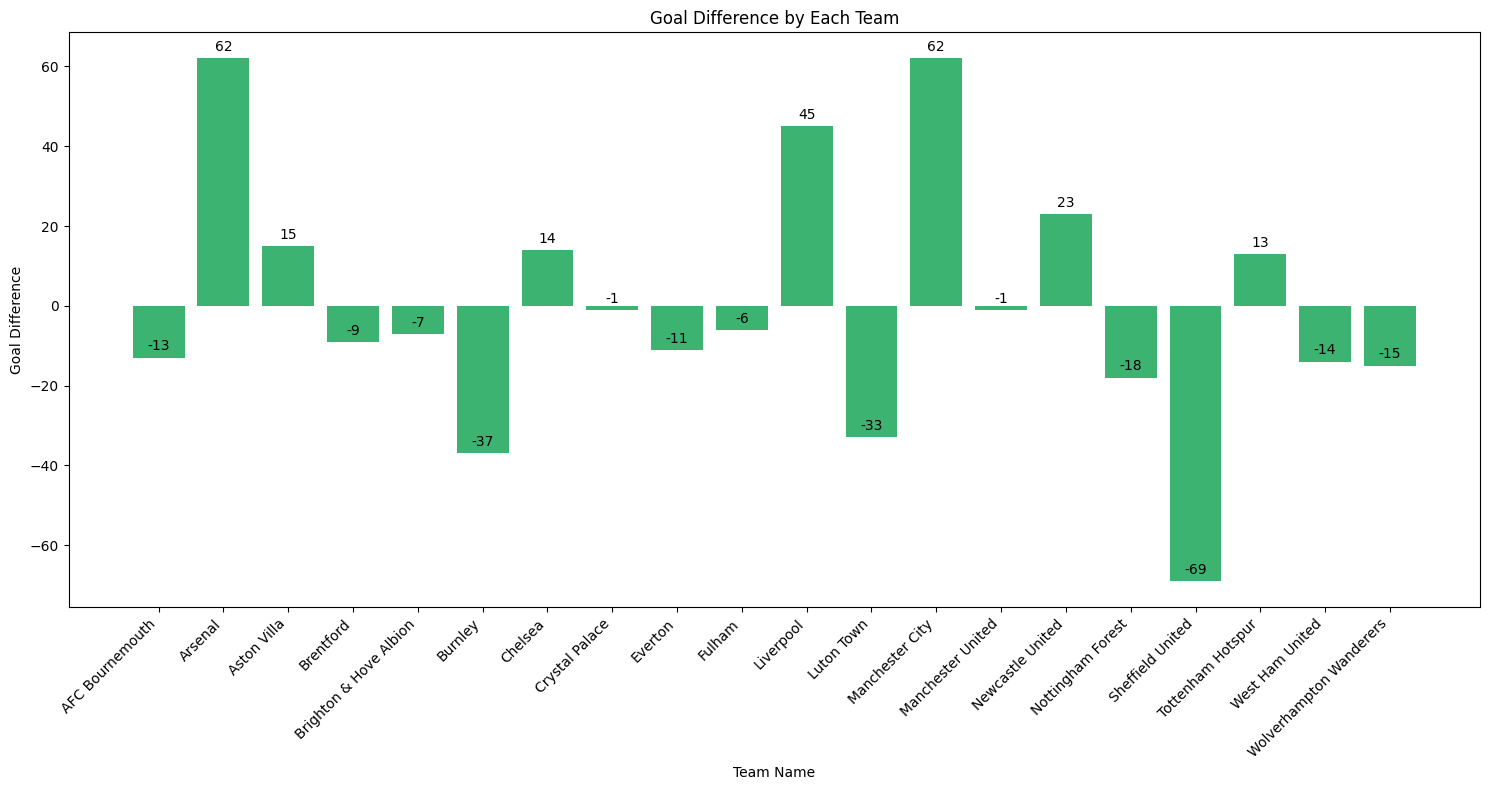

In [76]:
df2 = total_goals.sort_values(by='home_team_name').reset_index(drop=True)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create bar chart
bars = ax.bar(df2['home_team_name'], df2['Goal Difference'], color='mediumseagreen')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Team Name')
ax.set_ylabel('Goal Difference')
ax.set_title('Goal Difference by Each Team')
ax.set_xticklabels(df2['home_team_name'], rotation=45, ha="right")

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

fig.tight_layout()

plt.show()

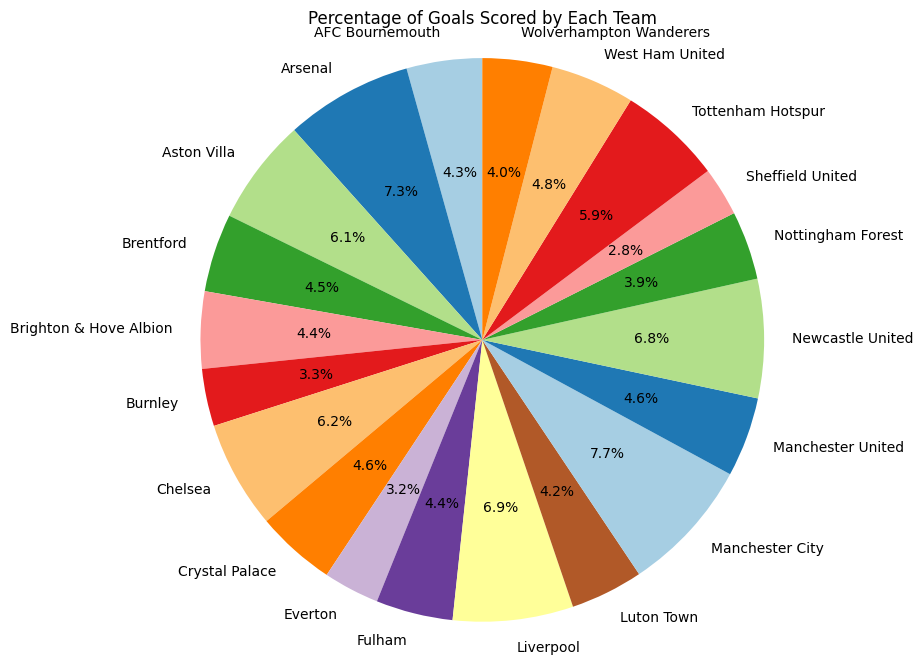

In [77]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(total_goals['Scored'], labels=total_goals['home_team_name'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Title
plt.title('Percentage of Goals Scored by Each Team')

plt.show()

In [78]:

team_stats['undefeated']= team_stats['wins']+team_stats['draws']
team_stats['undefeated_percentage']= team_stats['undefeated']/team_stats['total_matches']*100
team_stats['defeated_percentage']= 100- team_stats['undefeated_percentage']
print(team_stats)

                  team_name  wins  draws  losses  points  total_matches  \
0           Manchester City    28      7       3      91             38   
1                   Arsenal    28      5       5      89             38   
2                 Liverpool    24     10       4      82             38   
3               Aston Villa    20      8      10      68             38   
4         Tottenham Hotspur    20      6      12      66             38   
5                   Chelsea    18      9      11      63             38   
6         Manchester United    18      6      14      60             38   
7          Newcastle United    18      6      14      60             38   
8           West Ham United    14     10      14      52             38   
9            Crystal Palace    13     10      15      49             38   
10          AFC Bournemouth    13      9      16      48             38   
11                  Everton    13      9      16      48             38   
12   Brighton & Hove Albi

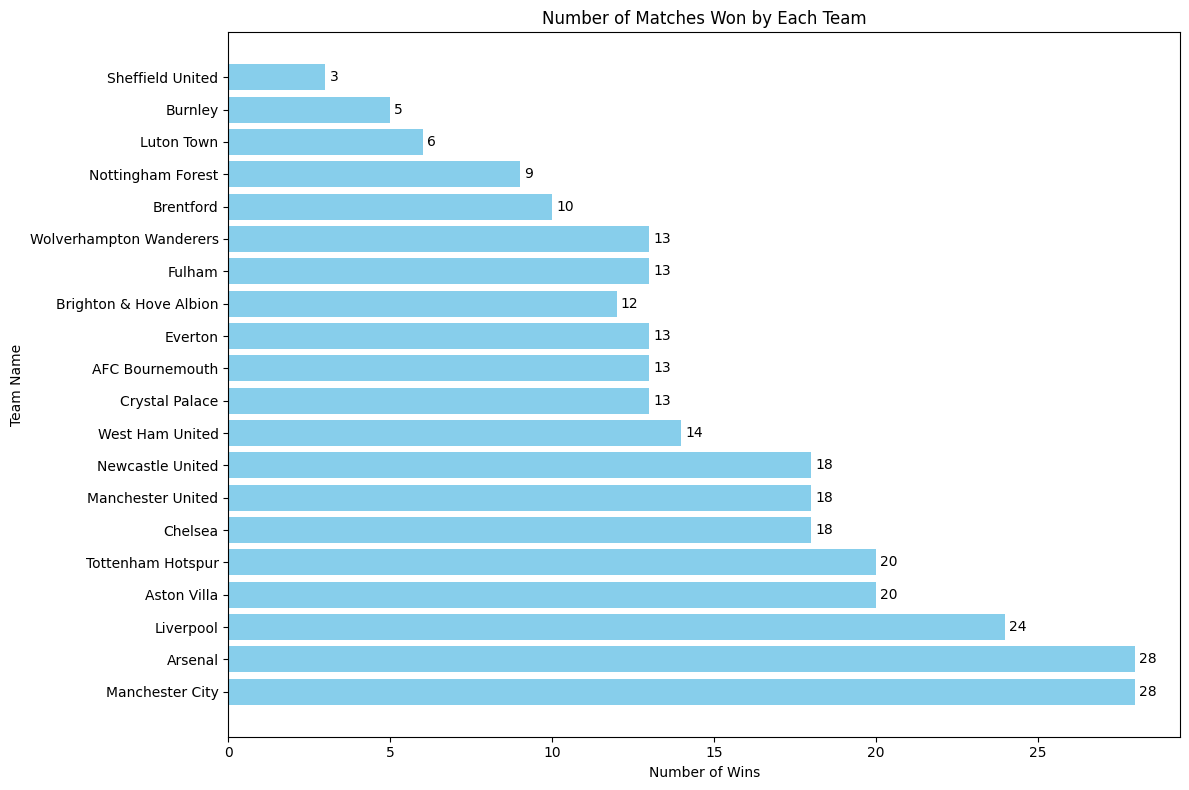

In [79]:
df1= team_stats
fig, ax = plt.subplots(figsize=(12, 8))

# Create bar chart
bars = ax.barh(df1['team_name'], df1['wins'], color='skyblue')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Wins')
ax.set_ylabel('Team Name')
ax.set_title('Number of Matches Won by Each Team')

# Add data labels on bars
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()

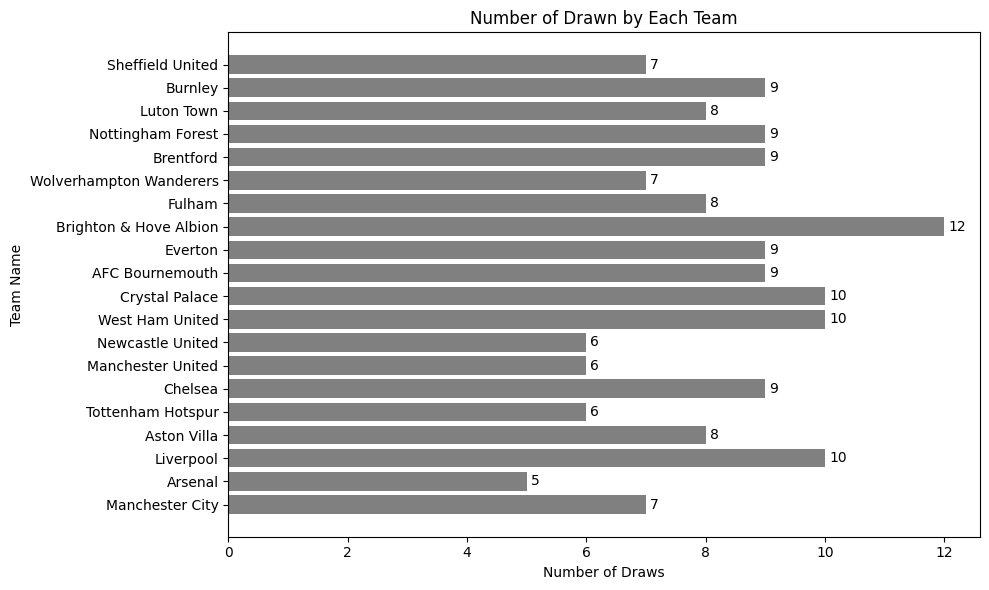

In [80]:
df3= team_stats
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bar chart
bars = ax1.barh(df3['team_name'], df3['draws'], color='grey')

# Add labels, title, and custom x-axis tick labels, etc.
ax1.set_xlabel('Number of Draws')
ax1.set_ylabel('Team Name')
ax1.set_title('Number of Drawn by Each Team')

# Add data labels on bars
for bar in bars:
    width = bar.get_width()
    ax1.annotate(f'{width}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center')

# Show the plot
plt.tight_layout()
plt.show()

###From the dataset the following things were noticed:<br>
51.6 % of the matches were played in 2023 while 48.4 % were played in 2024, hence we can say slightly more than half of the matches were played in 2023 <br>
Arsenal and Manchester City won 28 each <br>
Sheffield United manage to win only 3 matches out of 38 <br>
Brighton & Hove Albion had 12 matches resulting in draw which was the maximum by any team <br>
Arsenal had 5 matches resulting in draw which was the least by any team <br>
The home team has won 175 times which was 46.1% of the matches while away teams has won 32.4% <br>
Arsenal and Liverpool have won the most number of Home matches by any team which was 15 each <br>
Burnley and Sheffield United have won the least number of Home matches by any team which was 2 each <br>
Manchester City had won the most number of Away matches by any team which was 14 each <br>
Sheffield United had won the least number of Away matches by any team which was just 1 <br>
Manchester City scored the most number of goals which was 96 which is 2.52 per match <br>
Sheffield United scored the least number of goals which was 35 which is 0.92 per match <br>
Arsenal conceded the least number of goals which was 29 which is 0.76 per match <br>
Sheffield United conceded the most number of goals which was 104 which is 2.73 per match <br>
Arsenal and Manchester City had the best goal difference of +62 <br> 
Sheffield United had the worst goal difference of -69 <br>
Manchester City scored 7.7 % of the PL goals last season <br>
Sheffield United scored 2.8 % of the PL goals last season <br>
